<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/Atividade3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [1]:

# ------------------------- Brute Force ---------------------------#
def matching(T, S, i):
    for j in range(0,len(S)):
        if i == len(T) or S[j] != T[i]:
            return False
        i += 1
    return True


def Naive(T,S):
  for i in range(len(T)):
      if matching(T, S, i):
          return True
  return False 
  
# ------------------------- knuth–morris–pratt ---------------------------#

def createTableKMP(S):
    i = 0
    j = 1
    table = [-1 for _ in range(len(S))]
    table[0] = 0
    while j<len(S):
        if S[i]==S[j]:
            table[j] = i+1
            i+=1
            j+=1
        elif i == 0:
            table[j] = 0
            j+=1
        else:
            i = table[i-1]
    return table

def KMP(T,S):
    table = createTableKMP(S)
    j = 0
    i = 0
    while i < len(T):
        if S[j] == T[i]:
            if j+1 == len(S):
                return True
            j+=1
            i+=1
        elif j > 0:
            j = table[j-1]
        else:
            i+=1
    return False
  
# ------------------------- Boyer-Moore-Horspool ---------------------------#
from collections import defaultdict

def createTableBMH(S):
    SIZE_S = len(S)
    table = defaultdict(lambda:SIZE_S)
    for i in range(SIZE_S-1):
        table[(S[i])] = SIZE_S - i - 1
    return table


def BMH(T, S):
    m = len(S)
    table = createTableBMH(S)
    i = m-1
    while (i < len(T)):
        if T[i] == S[m-1] and T[i-len(S)+1:i+1] == S:
            return True
        i += table[T[i]]
    return False


In [ ]:
import time
import string
import random
import math

#defines the number of times each algorithm will be processed to obtain the average time
num_rounds = 20

#SEQUENCE_LENGTH = 0.1
SEQUENCE_LENGTH = 0.01
DR = dict()
#calculates the executions average time
def avgTime(func, size, debug=True):
  t = 0
  for i in range(num_rounds):  
    random.seed(size+i)        
    #T  = "".join( [random.choice(string.ascii_letters) for i in range(size)] )
    T  = "".join( [random.choice(string.digits) for i in range(size)] )
    start = random.randint(1, size)
    end = min(start + int(size*SEQUENCE_LENGTH+1), size)
    S  = T[start:end]

    start = time.time()
    p = func(T,S)
    end = time.time()    
    t += end - start

    if debug:  
      ##add the result or check if it is the same
      if (size,i) not in DR:
        DR[(size,i)] = (p,T,S)        
      else:             
        (sp,sT,sS) = DR[(size,i)]
        if p !=sp :
          print(f"1. S={DR[(size,i)][2]}, found={DR[(size,i)][0]} and T={DR[(size,i)][1]}")
          print(f"2. S={S}, found={p} and T={T} ")
          
        assert p == sp
      
  return t/num_rounds


#defines the algorithms to be processed
algorithms = [Naive,KMP,BMH]

sizes = [10000,20000,30000,40000,50000]

mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting collect {i+1}")
  
  #map list size to algorithm average time
  for algorithm in algorithms:
    print('  > ', algorithm.__name__)  
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], True)
  print("")

print(f"Finish data collection")

Starting collect 1
  >  Naive
  >  KMP
  >  BMH

Starting collect 2
  >  Naive
  >  KMP
  >  BMH

Starting collect 3
  >  Naive
  >  KMP
  >  BMH

Starting collect 4
  >  Naive
  >  KMP
  >  BMH

Starting collect 5
  >  Naive
  >  KMP


Gráfico

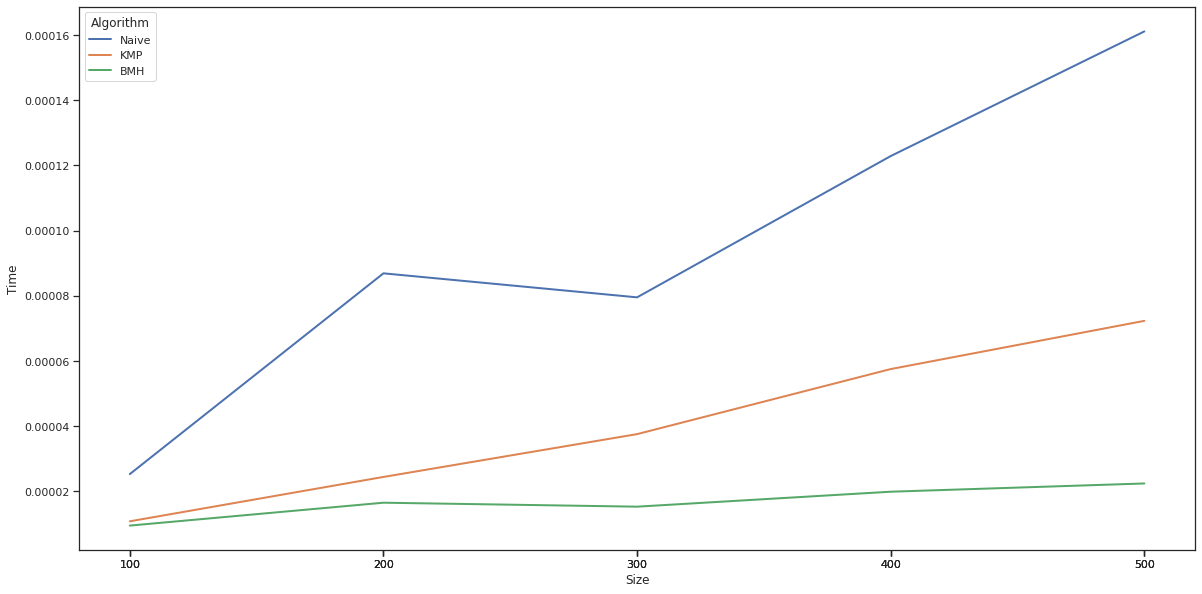

<Figure size 1440x720 with 0 Axes>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient='index', columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

#Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

#Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

chart = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)

#plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()